Loading data from csv file taken from
https://github.com/justmarkham/scikit-learn-videos/blob/master/06_linear_regression.ipynb <br>
Added .dropna()

In [8]:
import pandas as pd
import sklearn
import numpy as np

data = pd.read_csv("Advertising.csv", index_col=0).dropna()


# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Using sklearn to train LinearRegression model to compare later

In [9]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# pair the feature names with the coefficients
print()
print(list(zip(feature_cols, linreg.coef_)))


[('TV', 0.04656456787415029), ('Radio', 0.1791581224508884), ('Newspaper', 0.0034504647111804343)]


Numpy implementation

In [28]:
#converting to numpy arrays
train_x = X_train.as_matrix().T
train_y = y_train.as_matrix().reshape((1, -1))
test_x = X_test.as_matrix().T
test_y = y_test.as_matrix().reshape((1, -1))

# print(train_x.shape)
# print(train_y.shape)

#m - number of features, n - number of examples
m, n = train_x.shape

w = np.zeros((m, 1))
b = np.zeros((1, 1))

epochs = 100
learning_rate = 0.000001

losses = [] #array to keep track of progress
for i in range(epochs):
    prediction = np.dot(w.T, train_x) + b 
    
    assert(prediction.shape == train_y.shape) #shapes should be the same
    
    loss = np.mean(np.square(train_y - prediction))

    #without keepdims=True dw will have shape==(3,) this will cause bugs when you try to update weights
    db = -2 * np.mean(train_y - prediction, keepdims=True)
    dw = -2 * np.mean(train_x * (train_y-prediction), axis=1, keepdims=True) 
    
    b = b - db * learning_rate
    w = w - dw * learning_rate
    
    print("epoch", i)
    print("loss", loss)
    print()
    losses.append(loss)

epoch 0
loss 218.87493333333333

epoch 1
loss 196.17716927921313

epoch 2
loss 176.06239258240961

epoch 3
loss 158.23619293922215

epoch 4
loss 142.43771849190028

epoch 5
loss 128.4358506547791

epoch 6
loss 116.02581495451382

epoch 7
loss 105.0261781851567

epoch 8
loss 95.27618784381309

epoch 9
loss 86.63341483187546

epoch 10
loss 78.97166485397779

epoch 11
loss 72.17912788704399

epoch 12
loss 66.15673858290798

epoch 13
loss 60.816723561150454

epoch 14
loss 56.08131428939049

epoch 15
loss 51.88160667647378

epoch 16
loss 48.15655065542513

epoch 17
loss 44.85205493922486

epoch 18
loss 41.9201938213855

epoch 19
loss 39.3185043897078

epoch 20
loss 37.00936384743059

epoch 21
loss 34.95943781069874

epoch 22
loss 33.139191492082695

epoch 23
loss 31.522456602055705

epoch 24
loss 30.08604761739352

epoch 25
loss 28.80942178938611

epoch 26
loss 27.674377906160395

epoch 27
loss 26.664789391709537

epoch 28
loss 25.766367827744606

epoch 29
loss 24.966453430610073

epoch 30


Plotting progress

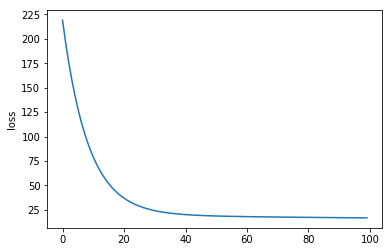

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.show()

In [14]:
#evaluation
prediction = np.dot(w.T, test_x) + b
loss = np.mean(np.square(test_y - prediction))
print(loss)

11.794618825894709
